# Credit Card Retention Analysis

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [3]:
data = pd.read_csv('../data/BankChurners_v2.csv')

In [5]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [6]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [7]:
# https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

***

## Distributions

![# https://commons.wikimedia.org/wiki/File:Relationship_between_mean_and_median_under_different_skewness.png](../images/measures_central_tendency.png "Title")

Let's start with `Customer Age`.

(array([2.650e+02, 6.540e+02, 1.478e+03, 1.778e+03, 2.422e+03, 1.920e+03,
        9.210e+02, 5.350e+02, 1.520e+02, 2.000e+00]),
 array([26. , 30.7, 35.4, 40.1, 44.8, 49.5, 54.2, 58.9, 63.6, 68.3, 73. ]),
 <BarContainer object of 10 artists>)

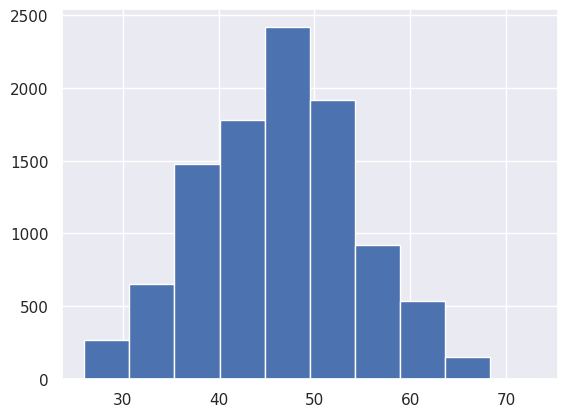

In [8]:
plt.hist(data['Customer_Age'])

Let's take a quick look at the distribution for `Months_on_book`. 

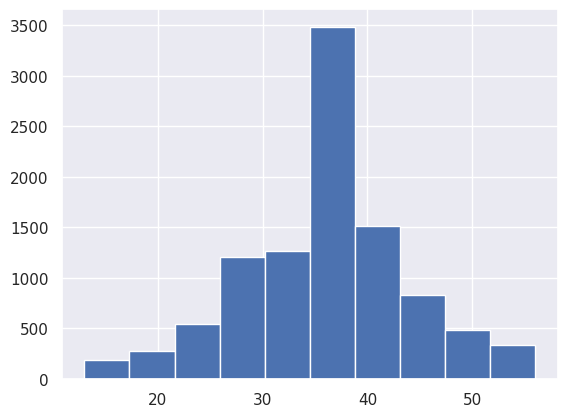

In [9]:
plt.hist(data['Months_on_book']);

Now let's take a look at the `Credit_Limit` variable that we looked at before:

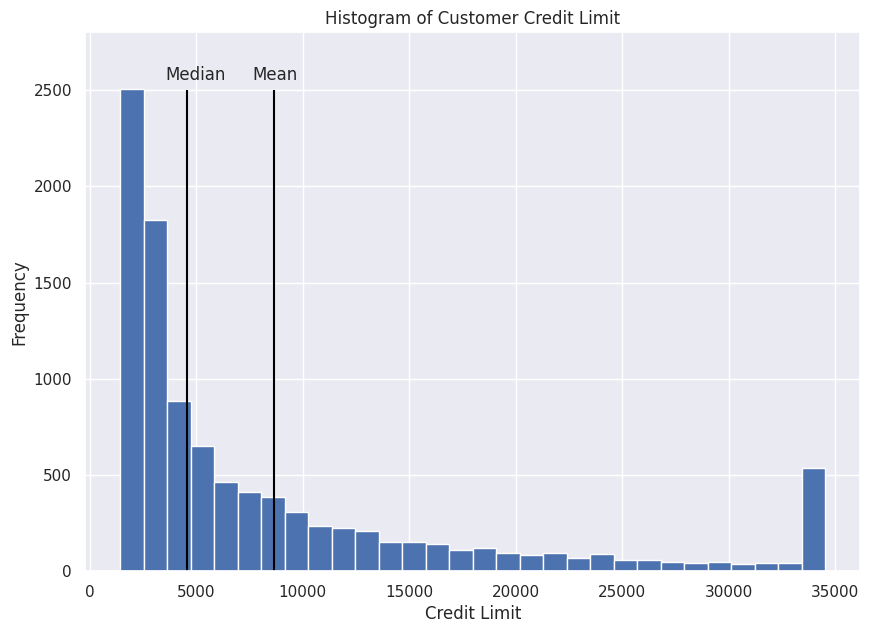

In [20]:
plt.figure(figsize=(10,7));
plt.hist(data['Credit_Limit'],bins=30);
plt.vlines(data['Credit_Limit'].mean(), 0, 2500, colors='Black')
plt.vlines(data['Credit_Limit'].median(), 0, 2500, colors='Black')
plt.text(data['Credit_Limit'].mean()-1000, 2500+50, "Mean")
plt.text(data['Credit_Limit'].median()-1000, 2500+50, "Median")
plt.ylim(0, 2800);
plt.title("Histogram of Customer Credit Limit");
plt.ylabel('Frequency');
plt.xlabel('Credit Limit');

Let's try `Total_Trans_Ct` that looked to have a somewhat similar mean and median. 

In [22]:
data['Total_Trans_Ct'].mean()

np.float64(64.85869457884863)

In [29]:
data['Total_Trans_Ct'].median()

np.float64(67.0)

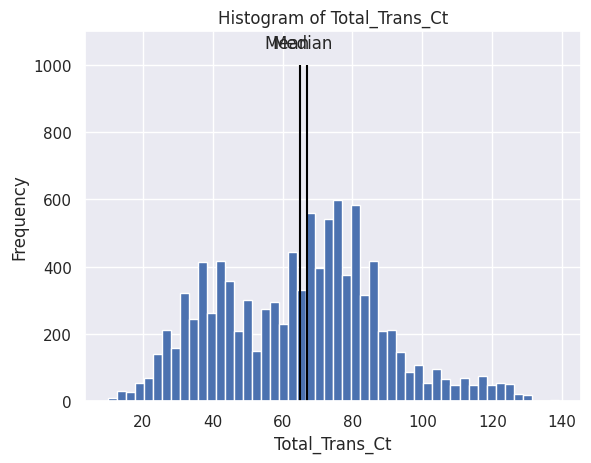

In [39]:
#plt.figure(figsize=(10,7));
plt.hist(data['Total_Trans_Ct'],bins=50);
plt.vlines(data['Total_Trans_Ct'].mean(), 0, 1000, colors='Black')
plt.vlines(data['Total_Trans_Ct'].median(), 0, 1000, colors='Black')
plt.text(data['Total_Trans_Ct'].mean()-10, 1000+50, "Mean")
plt.text(data['Total_Trans_Ct'].median()-10, 1000+50, "Median")
plt.ylim(0, 1100);
plt.title("Histogram of Total_Trans_Ct");
plt.ylabel('Frequency');
plt.xlabel('Total_Trans_Ct');